#Missing values, 
Some of the observations in a data set are blank.

ex. 
- Womens hesitate to put down their age
- Men hesitate to show their salary
- informations are not that valid

### Different types of data

##### 1. Categorical Data:

    It is a string type of data such as Gender, Sex, education, etc.
        ex : 
                 Sex
            0    male
            1  female
            2  female
            3  female
            4    male


#####  2. Discrite Data:
    It is a number type data which is whole number only, such as How many bank account you have,How many bike you have, etc.
    
        ex:
                Id	No. of Bank account
            0	1      	 2
            1	2       	1
            2	3	       3
            3	4       	1
            4	5       	2

##### 3. Continous Data:
    
    It is a number type data such as Age, Height, Profit, etc.

        ex : 
                 Age	 Height
            0	22.0	70.250
            1	38.0	71.283
            2	26.0	72.925
            3	35.0	69.100
            4	35.0	78.500


### Different types of Missing data

##### 1. Missing Completely at Random (MCAR)
    - The variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations.
    - When data is MCAR, there is absolutely no relationship between the data missing and other values.
    
    ex. 
    

        PassengerId	Survived	Pclass	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
        62	           1	     1		female 38.0	 0	    0	   113572	80.0	 B28	  NaN
        830              1	     1		female 62.0     0	  0         113572	80.0    B28	  NaN
        
     Null values present in Embarked feature there is no relationship between Embarked's Null values and any other features.

##### 2. Missing Data Not at Random (MNAR)
    - There is absolutely some relationship between the data misssing and any other feature's  values in dataset.
    
     ex: 
        
            PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
            	6	       0	    3	male	NaN	0	0	330877 8.4583  NaN	Q
            	18	      1        2	male	NaN	0	0	244373 13.0000  NaN	S
            	20          1    	3	female  NaN	0	0	2649   7.2250  NaN	C
            	27	      0    	3	male	NaN	0	0    2631  7.2250	NaN	C
            	29	      1    	3	female NaN	 0	0   330959	7.8792 NaN	Q   
                
      Null values are present in 'Age' and 'Cabin' feature too so it is having relationship between this feature. Suppose person in that specific cabin is not survied and that's why their Age is unknown.

##### 3. Missing at Random(MAR)
    - If the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
    - When Data is MAR, The data is missing but can be predicted from other information.
    
    ex:
        
              Sex	Age
        	female	NaN
        	male  	30
        	male	  19
        	female	NaN
        	female	4

## All techniques of handling Missing values

    1. Mean/Mode/Median replacement
    2. Random sample imputation
    3. Capturing NAN values with a new feature
    4. End of Distribution imputation
    5. Arbitrary imputation
    6. Frequent categories imputation   

#1. Mean Median Mode imputation
- This techinique is used when Data is Missing Completely at Random(MCAR)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly 


In [ ]:
url='https://raw.githubusercontent.com/Rushi21-kesh/Handling-Missing-Values/main/Titanic.csv'
data = pd.read_csv(url)
df1 = data.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Check null values


In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there is 177 null values in 'Age',687 in 'Cabin' and 2 in 'Embarked' feature.



## Handle Missing values by using Mean Median Mode imputation

Replace All NaN values in Age feature with mean

In [ ]:
# Calculate Mean
mean = df1['Age'].mean()
mean

29.69911764705882

In [ ]:
# Method 1:
# df1['Age']=df1['Age'].fillna(mean) 

In [ ]:
# Method 2:
def fill_NAN_Age_mean(df1,variable,mean):
    df1[variable]=df1[variable].fillna(mean)
    
fill_NAN_Age_mean(df1,'Age',mean)

Check null values after replace NAN with mean

In [ ]:
#check age column nul values
df1['Age'].isnull().sum()

0

Now, there may be some outliers are present in Age feature. if we replace NaN with Mean then this feature not follow Gaussion Distribution.

- So insted of Mean use Median and replace NaN and replace All NaN values in Age feature with median


In [ ]:
df2 = data.copy()
#Calculate Median
median = df2['Age'].median()
median

28.0

In [ ]:
# Method 1:
# df2['Age'] = df2['Age'].fillna(df['Age'].median())

In [ ]:
#Method 2 :
def fill_NaN_Age_Median(df2,variable,median):
    df2[variable]=df2[variable].fillna(median)

In [ ]:
fill_NaN_Age_Median(df2,'Age',median)

In [ ]:
df2['Age'].isnull().sum()

0

If there is some frequent value are present in feature then replace NaN values with that frequent value.

ex. In a classs most of students are 17 years old, suppose we have some entries with Missing Age then we assume Age of that student is also 17 years and replace nan with 17 (17 is the frequent value or mode)

In [ ]:
df3 = data.copy()
#Calculate mode
mode=df3['Age'].mode()[0]
mode

24.0

In [ ]:

# method 1:

#df3['Age'] = df3['Age'].fillna(mode)


In [ ]:
#method 2:
def fill_NAN_Age_mode(df3,variable,mode):
    df3[variable] = df3[variable].fillna(mode)
    
fill_NAN_Age_mode(df3,'Age',mode)

In [ ]:
df3['Age'].isnull().sum()


0

#Random Sample Imputation
* First we take a random observation from the feature.

* Then we use random observation to replace NaN in that feature.

* It should be used when data is missing completely at random (MCAR)

In [ ]:
# Loading data
df = pd.read_csv(url,usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


##Check null values

In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

There is 177 null values are present in Age feature.
##Now, we replace this NaN by using Random Sample Imputation

In [ ]:
#get a random sample 
df4=df
df4['Age'].dropna().sample()

436    21.0
Name: Age, dtype: float64

In [ ]:
#the NaN index
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

 .dropna() function drop all nan values in that feature and .sample() function return any one random value

In [ ]:
df4['Age'] = df3['Age'].fillna(sample)


In [ ]:
df4.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

#Capturing NaN values with a new feature
* In this method we create a new feature for NaN values where we set NaN=1 else 0
* This method shoud apply when missing data type is MNAR
* There is absolutely some relationship between the data misssing and any other feature's values in dataset.
* After creating mew feature then handle NaN values in old feature by using suitable method

In [ ]:
data = pd.read_csv(url,usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


##Check NaN values

In [ ]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

<AxesSubplot:>

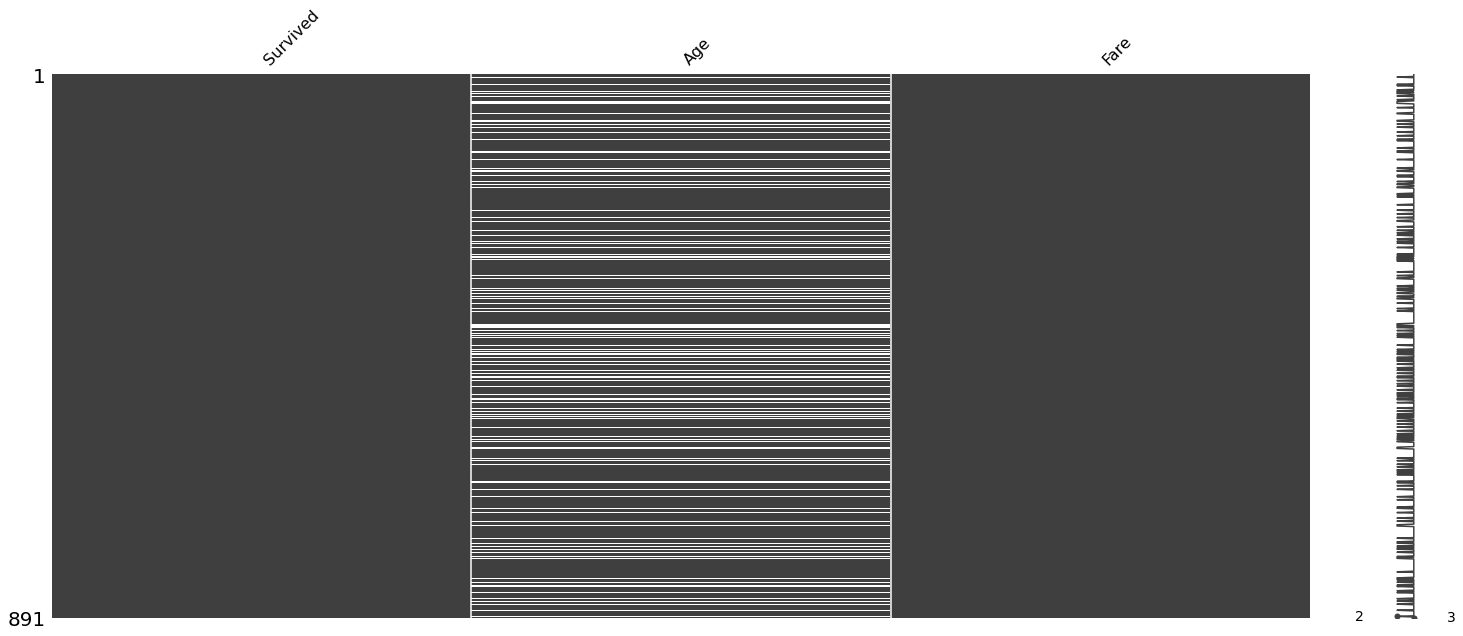

In [ ]:
mn.matrix(data)

There is 177 NaN values are present in Age feature it is approximately 20%
##Now, Apply Capturing NaN values with a new feature method

In [ ]:
data['Age_NaN'] = np.where(data['Age'].isnull,0,1)

In [ ]:
data.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


* We created a new feature for capturing a NaN

* Now you can handle NaN in data['Age'] feature

Fo* r handling this data['Age'] feature you can use verious methods

#End of Distribution imputation

In [ ]:
data = pd.read_csv(url,usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


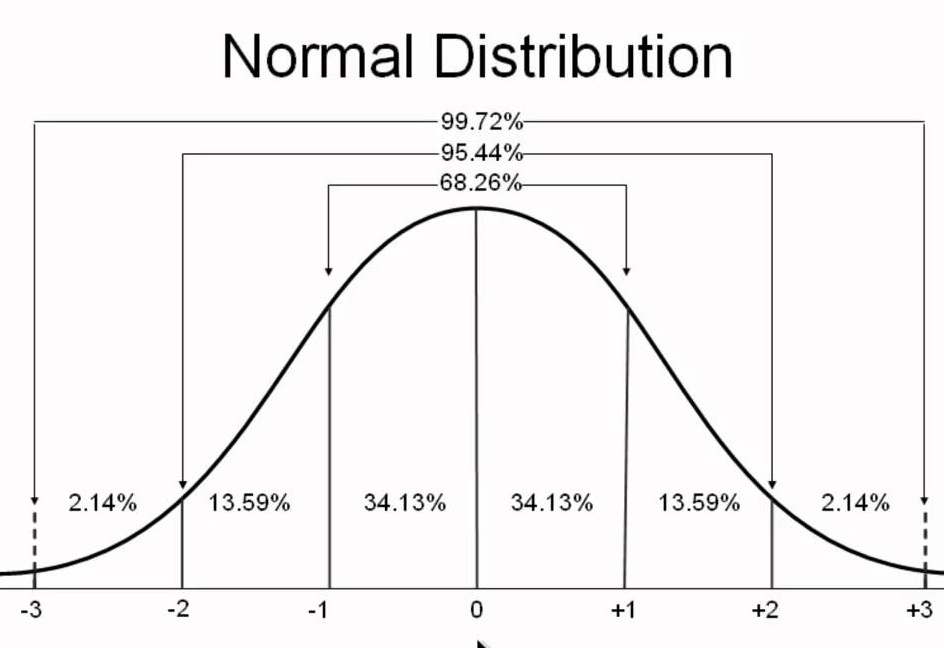

In [ ]:
data.isnull().sum()

In [ ]:
#first find mean of Age feature
mean = data['Age'].mean()
mean

29.69911764705882

In [ ]:
#now find stander deviation of Age Feature
std = data['Age'].std()
std

14.526497332334042

In [ ]:
extreme = (mean + (3*std))
extreme

73.27860964406094

##let's use some plot for better understanding


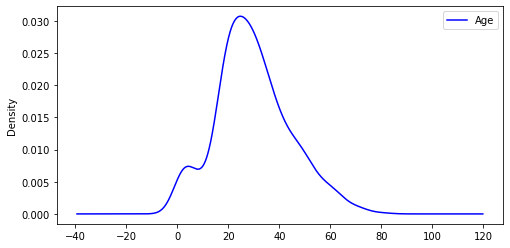

In [ ]:
plt.figure(figsize=(8,4))
data.Age.plot(kind='kde',color='b')
plt.legend()

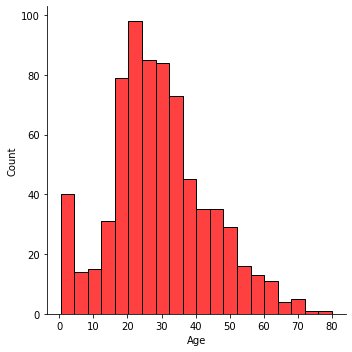

In [ ]:
sns.displot(data['Age'],color='r')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

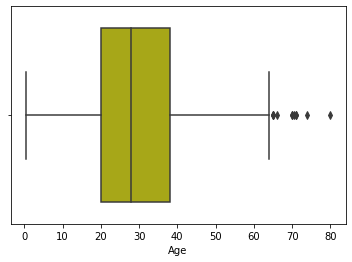

In [ ]:
sns.boxplot(data['Age'],color='y')

## Create a function to replace misssing in Age with extreme values


In [ ]:
def End_distribution(df,variable,extreme):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [ ]:
End_distribution(data,'Age',extreme)
data.head()

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


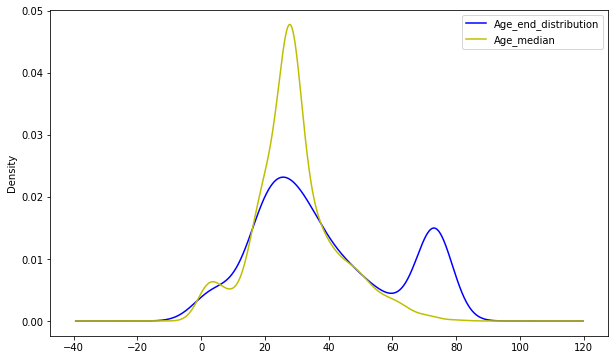

In [ ]:
plt.figure(figsize=(10,6))
data.Age_end_distribution.plot(kind='kde',color='b')
data.Age_median.plot(kind='kde',color='y')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

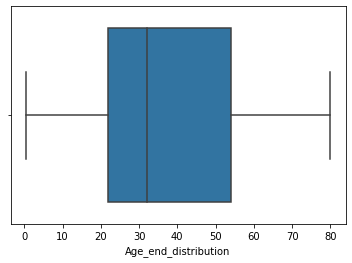

In [ ]:
sns.boxplot(data['Age_end_distribution'])

* when we replace NaN with median then it show distortion
* we overcome tbis when we replace NaN with End of Distribution and outlier is also covered.